In [163]:
import numpy as np
from Simulation import simulate
from Models import diffusion_advection
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ABC import abc

In [127]:
def dist_fun(theta):
    Cell_Count_U = 4e8
    Cell_Count_L = 6.25e9
    inits = np.array([Cell_Count_U, 0, 0, 1.3e3, Cell_Count_L, 0, 0, 0, 0])
    p = [theta[0], theta[1], 4, 2, 5.2, theta[2], theta[3], theta[4], 20, 0.56*2.8e-6 / 7, 0.27 / 7, theta[5], theta[6]]
    ts = np.linspace(0,10,1001)
    x = 100 * np.array([4,4,5,5,5,6,6,6,6,6,6,7,7,7,7,8])
    results = simulate.solve_model(diffusion_advection.model, inits, ts, (p,))
    Lresults = results[x,3]
    y = 10**np.array([7.2,5.40,5.1,7.05,7.7,7.68,7.85,7.73,7.01,6.073,4.45,5.894,5.5356,4.325,3.959,6.548])
    return np.sum((y - Lresults)**2)

In [134]:
post = abc.abc(dist_fun,N_part=50)

In [151]:
post_df = pd.DataFrame(post).T
post_df.columns = ["b_u","b_l","p_u","p_l","gamma","D","a"]

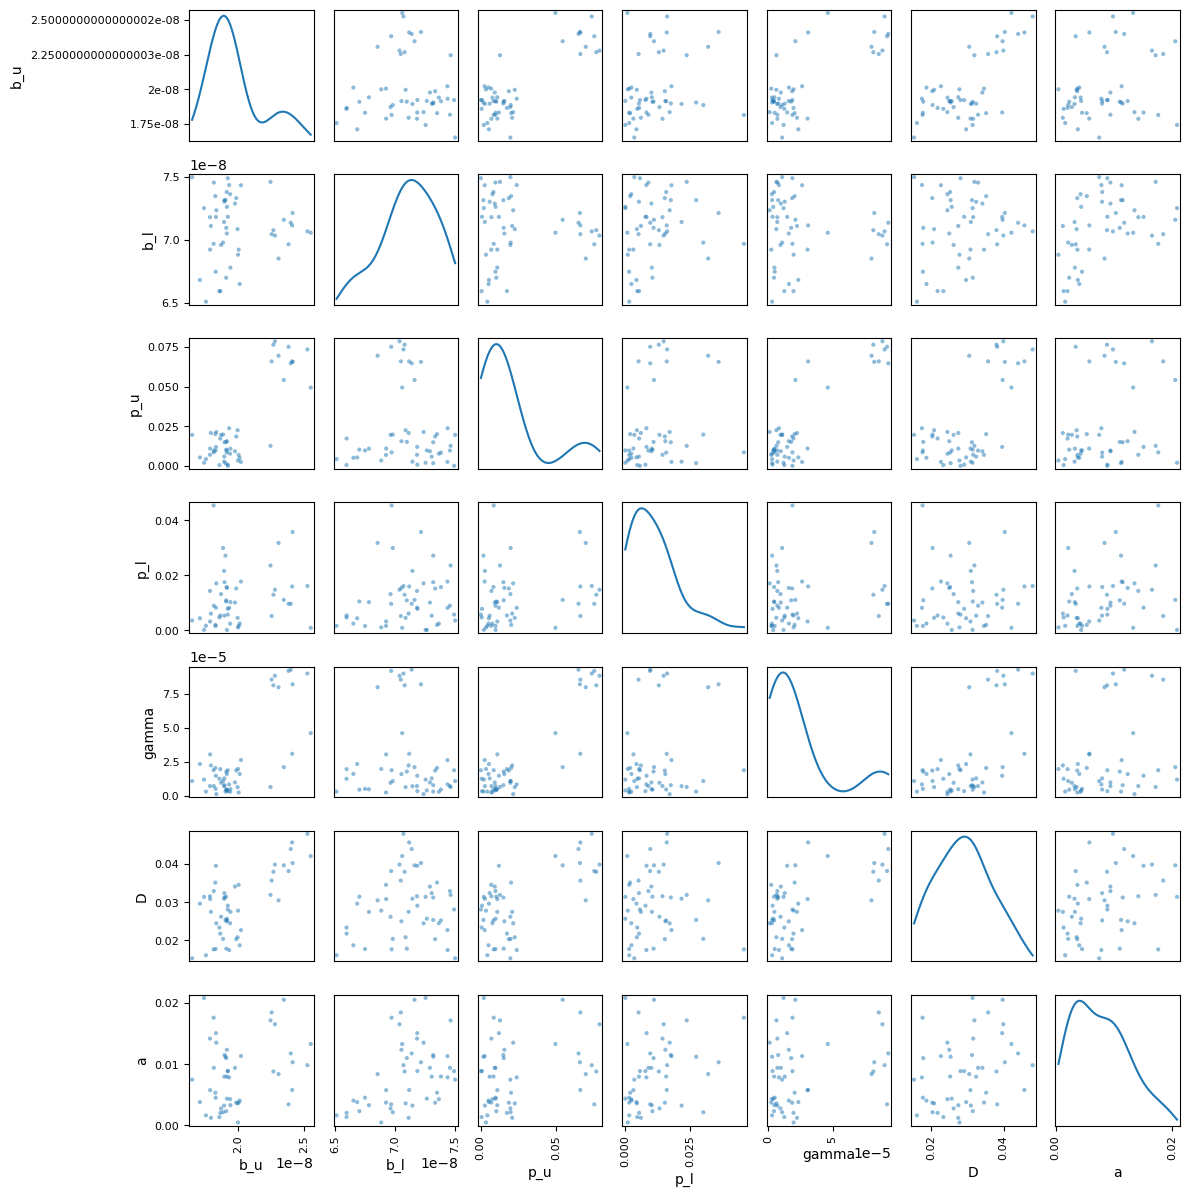

In [162]:
pd.plotting.scatter_matrix(post_df,figsize=(12,12),diagonal='kde')
plt.tight_layout()